## Observations and Insights 

In [274]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data= pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [275]:
# Checking the number of mice.
mice_count = len(combined_data['Mouse ID'].unique())
print(f"Total Mice Count = {mice_count}")

Total Mice Count = 249


In [276]:
#check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice= combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

#show which Mice ID is associated with duplicate Time points. Use this ID to select data that will be removed from dataset
print(f"Mice ID(s) {dup_mice} has duplicated time points and its data should be removed from data set")

Mice ID(s) ['g989'] has duplicated time points and its data should be removed from data set


In [277]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df= combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [278]:
# Create a clean DataFrame by dropping all the records associated with the duplicate mouse by its ID.
cleaned_data=combined_data[combined_data['Mouse ID'].isin(dup_mice)!=True]

#show resulting data set
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [279]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(cleaned_data['Mouse ID'].unique())
print(f"Total Mice Count in cleaned set = {new_mice_count}")

Total Mice Count in cleaned set = 248


## Summary Statistics

In [280]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
sum_stat_df=cleaned_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean= sum_stat_df['Tumor Volume (mm3)'].mean()
median=sum_stat_df['Tumor Volume (mm3)'].median()
var=sum_stat_df['Tumor Volume (mm3)'].var()
stdev=sum_stat_df['Tumor Volume (mm3)'].std()
sem=sum_stat_df['Tumor Volume (mm3)'].sem()

#print(mean, median,var, stdev, sem)
# Assemble the resulting series into a single summary dataframe.
tumor_stats_df = pd.DataFrame({"Mean": mean, 
                           "Median": median, 
                           "Variance": var, 
                           "Standard Deviation": stdev, 
                           "SEM": sem})
#show new table with values
tumor_stats_df 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [281]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_stats_again = cleaned_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
tumor_stats_again

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


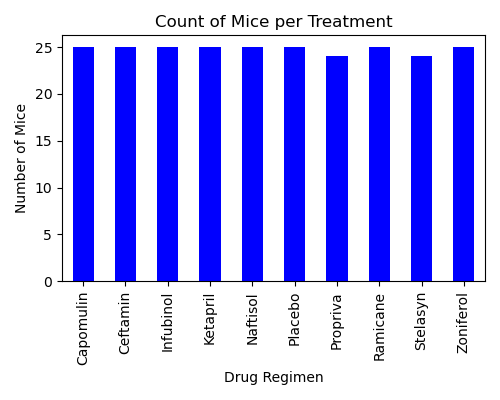

In [303]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_drug=cleaned_data.groupby('Drug Regimen')['Mouse ID'].nunique()
fig1, ax1 = plt.subplots(figsize=(5,4))
plot_mice=mice_per_drug.plot.bar(color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Count of Mice per Treatment")
plt.tight_layout()


In [304]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#get list for x and Y axis
drug_names= tumor_stats_df.index.tolist()
x_axis=drug_names

In [305]:
mice_totals = (cleaned_data.groupby('Drug Regimen')['Mouse ID'].nunique()).tolist()
mice_totals

[25, 25, 25, 25, 25, 25, 24, 25, 24, 25]

<IPython.core.display.Javascript object>


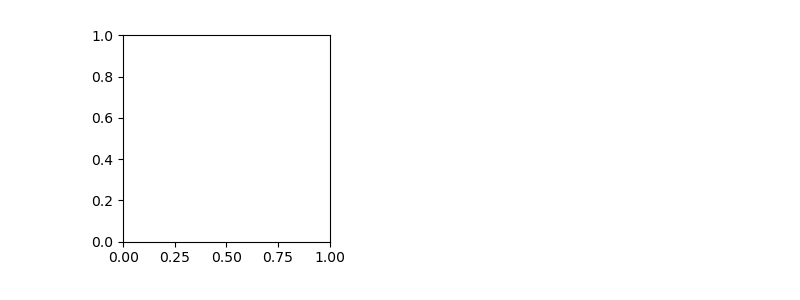

In [306]:
#plot results
fig2, ax1 = plt.subplots(figsize=(8, 3))
plt.bar(x_axis, mice_totals, color='r')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Count of Mice per Treatment")
plt.tight_layout()
plt.show()

In [307]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(cleaned_data.groupby('Sex')['Mouse ID'].nunique()).reset_index()

gender_data.head()

,Sex,Mouse ID
0,Female,123
1,Male,125


<IPython.core.display.Javascript object>


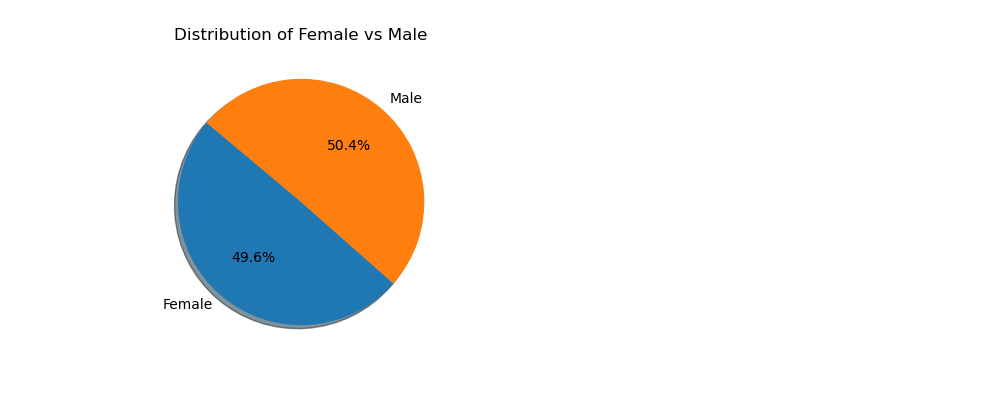

Text(0, 0.5, '')

In [313]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(121, aspect="equal")
gender_data.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',startangle=140, shadow=True, labels=gender_data["Sex"], legend = False)

plt.title('Distribution of Female vs Male')
plt.ylabel('')

<IPython.core.display.Javascript object>


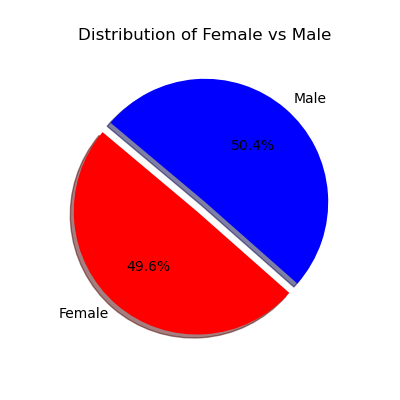

In [320]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create lists

#total counts
gen_totals = (cleaned_data.groupby('Sex')['Mouse ID'].nunique()).tolist()
#to use as labels
gen_names= gender_data['Sex'].tolist()

explode = (0.1, 0)

#start plotting
fig4, ax1 = plt.subplots(figsize=(4, 4))
plt.pie(gen_totals, explode=explode,labels=gen_names, colors=['r','b'], autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Distribution of Female vs Male')
plt.ylabel(' ')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
